Complete documentation: https://osf.io/4rd8g/
## **Penman-Monteith FAO model** 
    - Author Michele Bottazzi and Concetta D'Amato
    - Licence Creative Commons 4.0

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| Prospero | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |



### **Component Description**
The GEOframe-NewAge ET component offers two different formulations for the evapotraspiration modeling: the FAO Penman-Monteith model and the PriestleyTaylor model
\begin{equation}
ET_{0}^{FAO} =  K_{s} \cdot K_{c} \cdot \dfrac{0.408\cdot \Delta\cdot (R_{n} - G)+\gamma\cdot u_{2}\cdot(e_{s}-e)\cdot\frac{C_{p}}{T+273}}{\Delta+\gamma\cdot(1+C_{d}\cdot u_{2})}
\end{equation}

With:
\begin{equation}
 G =  \begin{cases}
   G_{morn}\cdot R_{n} \quad daylight\\G_{night}\cdot R_{n} \quad nighttime
   \end{cases} 
\end{equation}
where:
- $ET_{0}$ or $ET$ are expressed in [$mm \cdot day^{−1}$] or [$mm\cdot hour^{−1}$]; 
- $K_{s}$ is the water stress coefficient [-];
- $K_{c}$ is the crop coefficient [-];
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $T$ is the mean daily or hourly air temperature expressed in (°C) ; 
- $u_{2}$ is the wind speed in ($m\cdot s^{−1}$); 
- $e_{s}$ is the mean saturation vapor-pressure expressed in ($kP_{a}$); 
- $e$ is the mean actual vapor-pressure; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 
- $C_{d}$ is a coefficient equal to 0.34 and $C_{p}$ is a coefficient equal to 900 in the case of a daily time step and equal to 37 in the case of a hourly time step.


### **Detailed Inputs description**
General description
The input file is a .csv file containing a header and one or more time series of input data,
depending on the number of stations involved. Each column of the file is associated to a
different station.
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8:value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in thiscase, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).


- #### **Net radiation**
The net radiation is given in time series of ($W/m^{2}$) values. The conversion from ($W/m^{2}$) to ($MJ\cdot m^{2}$) is automatically done by the component.
- #### **Average wind speed**
The average wind speed is given in time series of (m/s) values.
- #### **Relative humidity**
The relative humidity is given in time series or raster maps of (% ) values.
- #### **Air temperature**
The air temperature is given in time series of (°C) values. The conversion in K is directly done by the component.
- #### **$G_{morn}$**
$G_{morn}$ is the coefficient for the soil heat flux during daylight
- #### **$G_{night}$**
$G_{night}$ is the coefficient for the soil heat flux during nighttime
- #### **doHourly**
doHourly is a boolean field to set the time step of the simulation (”true” is hourly time step, ”false” is daily).
- #### **Start Date**
Start Date is a string containing the first day of the simulation.
- #### **Crop Coefficient**
The crop coefficient is a coefficient tipical of the cultivar $\rightarrow$ http://www.fao.org/3/X0490E/x0490e0b.htm#crop%20coefficients TABLE 12
- #### **Water wilting point**
Is defined as the minimal amount of water in the soil that the plant requires not to wilt. 
- #### **Water field capacity**
Field Capacity is the amount of soil moisture in the soil after excess water has drained away and the rate of downward movement has decreased. 
- #### **Roots depth**
Rooting depth in [m] $\rightarrow$ http://www.fao.org/3/X0490E/x0490e0e.htm#total%20available%20water%20(taw) TABLE 22
- #### **Depletion fraction**
Is the average fraction of available water that can be depleted from the root zone before moisture stress occurs.
http://www.fao.org/3/X0490E/x0490e0e.htm#TopOfPage 
Table 22

### **Detailed Outputs description**
The output file will have exactly the same heading of the input file. 
- #### **Time series of the latent heat (W/m$^{2}$)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.
- #### **Time series of the evapotranspiration (mm)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import plotly.express as px
import plotly.graph_objects as go
import os
oms_project_path = os.path.dirname(os.getcwd())

In [2]:
os.chdir(oms_project_path+'/resources/Output/')
#os.listdir()

## Read the Penman Monteith FAO output

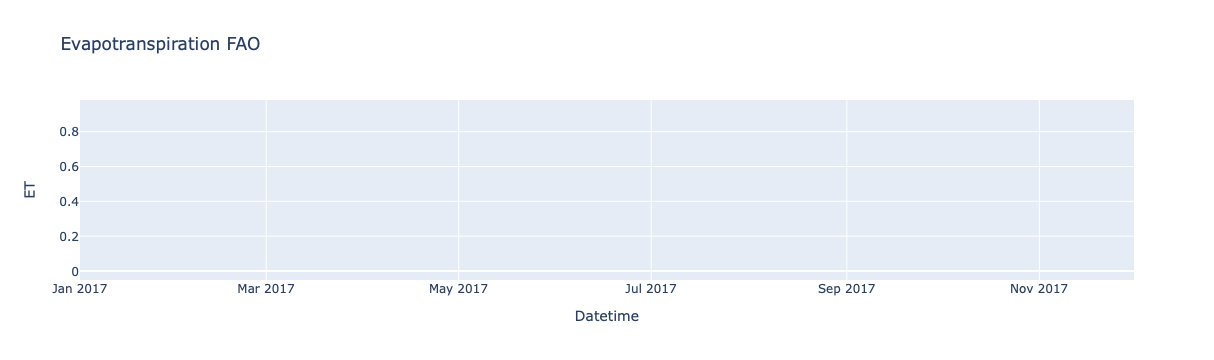

In [14]:
df = pd.read_csv('ETFAO_potential.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','ET']
fig = px.line(df, x='Datetime', y='ET', title='Evapotranspiration FAO')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

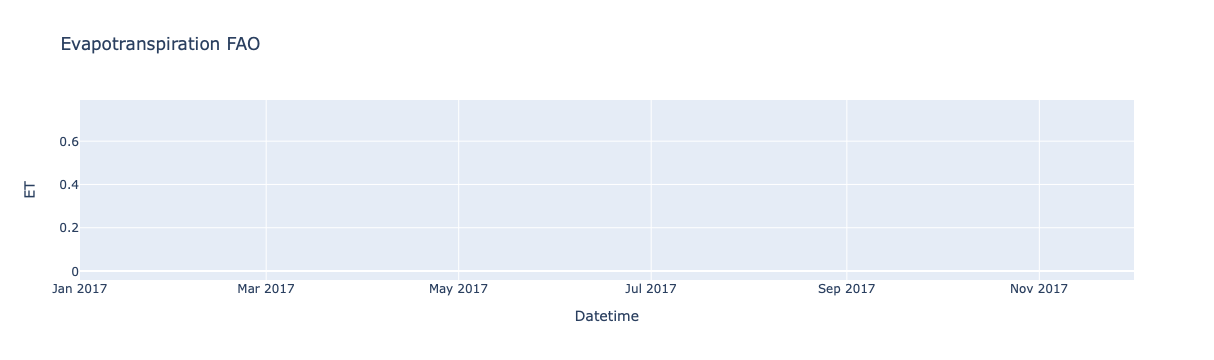

In [15]:
df4 = pd.read_csv('ETFAO_actual.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df4.columns = ['Datetime','ET']
fig = px.line(df4, x='Datetime', y='ET', title='Evapotranspiration FAO')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

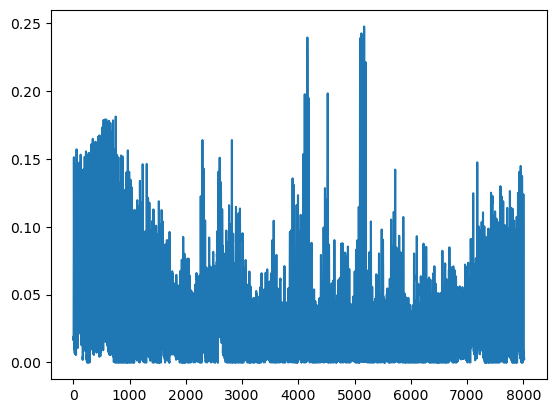

In [16]:
diff=df.ET-df4.ET
plt.plot(diff)

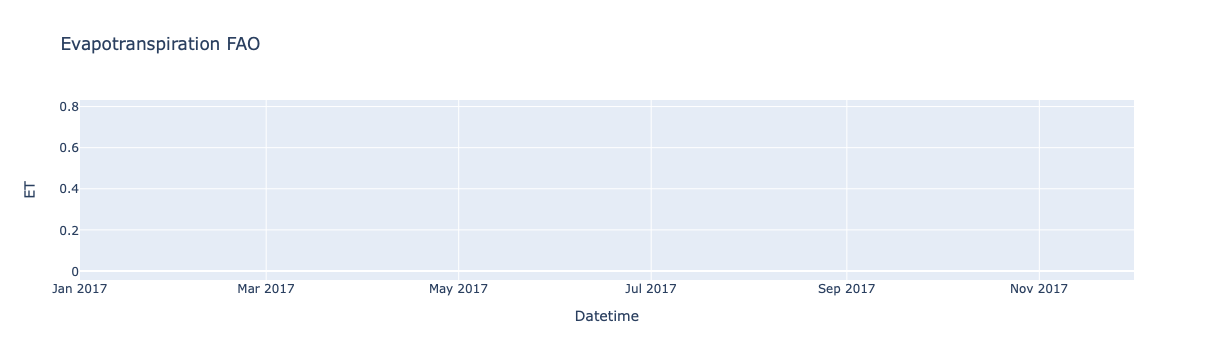

In [19]:
df1 = pd.read_csv('ETFAO_env.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df1.columns = ['Datetime','ET']
fig = px.line(df1, x='Datetime', y='ET', title='Evapotranspiration FAO')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

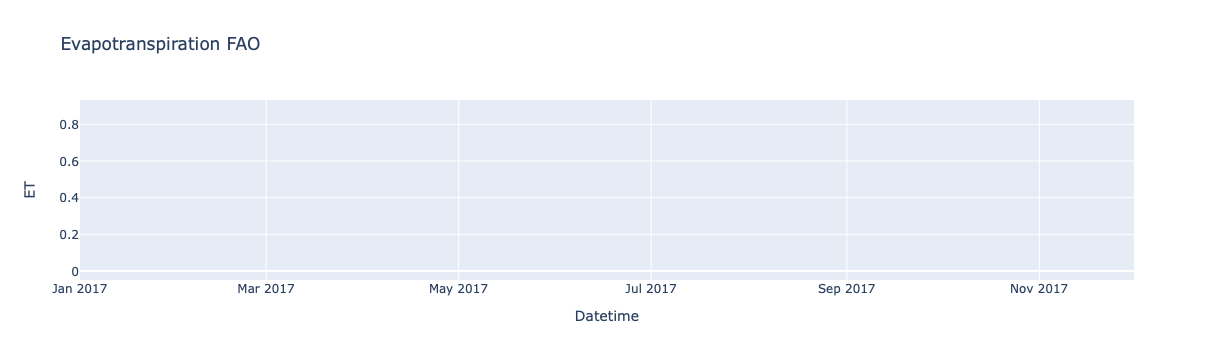

In [20]:
df5 = pd.read_csv('ETFAO_water.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df5.columns = ['Datetime','ET']
fig = px.line(df5, x='Datetime', y='ET', title='Evapotranspiration FAO')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

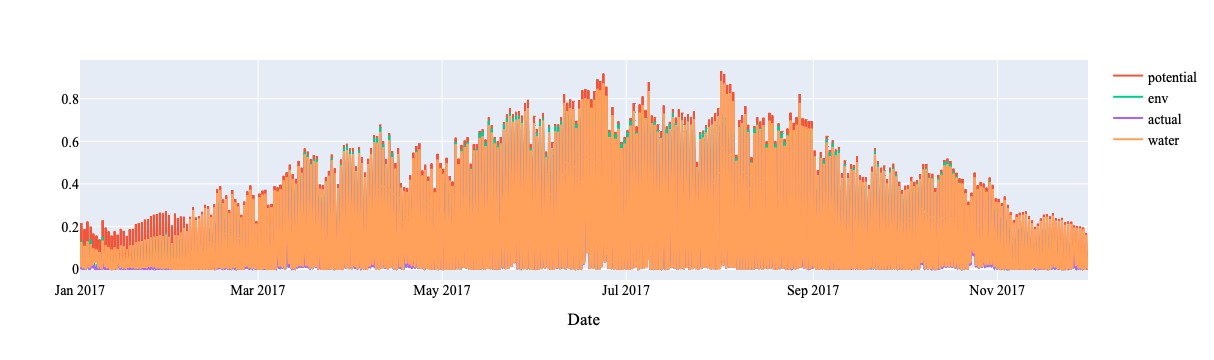

In [22]:
fig = px.line()
fig.add_trace(go.Scatter(x=df['Datetime'], y=df['ET'], mode='lines', name='potential'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df1['ET'], mode='lines', name='env'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df4['ET'], mode='lines', name='actual'))
fig.add_trace(go.Scatter(x=df['Datetime'], y=df5['ET'], mode='lines', name='water'))


fig.update_layout(
    title='',
    xaxis_title="Date",
    font_family="Times New Roman",
    font_color="Black",
    font=dict(size=14))
fig.show()

In [ ]:
diff2=df1.ET-df5.ET
plt.plot(diff2)

In [ ]:
df3 = pd.read_csv('ETtotalStressedFAO.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df3.columns = ['$Datetime$','ET']
fig = px.line(df3, x='$Datetime$', y='ET', title='Evapotranspiration FAO')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
df6 = pd.read_csv('ETtotalStressedFAOold.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df6.columns = ['$Datetime$','ET']
fig = px.line(df6, x='$Datetime$', y='ET', title='Evapotranspiration FAO')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
diff3=df3.ET-df6.ET
plt.plot(diff3)

In [ ]:
df2 = pd.read_csv('latentHeat_FAO_1.csv',skiprows=6, sep=',', parse_dates=[0], na_values=-9999,usecols=[1,2])
df2.columns = ['$Datetime$','[$W\cdot m^{−2}$]']
fig = px.line(df2, x='$Datetime$', y='[$W\cdot m^{−2}$]', title='Latent Heat - FAO')
#fig.update_xaxes(rangeslider_visible=True)
fig.show()